In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [37]:
customers_df.sample(6)

,CustomerID,CustomerName,Region,SignupDate
105,C0106,Amanda Mcguire,Asia,2022-09-22
46,C0047,Samantha Frank,North America,2024-03-22
95,C0096,Benjamin Mcclure,South America,2022-11-18
26,C0027,Justin Heath,Asia,2022-11-09
188,C0189,Sherri Dixon,North America,2024-01-22
114,C0115,Joshua Hamilton,Asia,2024-11-11


In [39]:
products_df.sample(5)

,ProductID,ProductName,Category,Price
85,P086,SoundWave Novel,Books,440.70
67,P068,TechPro Novel,Books,447.23
97,P098,SoundWave Laptop,Electronics,299.93
23,P024,SoundWave Cookbook,Books,338.66
77,P078,HomeSense Rug,Home Decor,41.18


In [41]:
transactions_df.sample(4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
182,T00163,C0101,P007,2024-03-13 22:33:34,4,1680.60,420.15
905,T00730,C0008,P094,2024-01-22 19:40:43,2,894.68,447.34
542,T00868,C0039,P011,2024-09-08 14:32:15,4,1044.80,261.20
539,T00698,C0119,P011,2024-12-26 21:34:07,1,261.20,261.20


In [150]:
customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [152]:
products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [154]:
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [156]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [158]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [160]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [57]:
#Merging datasets 
merged_data = transactions_df.merge(products_df, on="ProductID", how="left")
merged_data = merged_data.merge(customers_df, on="CustomerID", how="left")

In [87]:
merged_data.sample()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
189,T00021,C0145,P038,2024-01-11 09:47:21,2,294.44,147.22,TechPro Vase,Home Decor,147.22,Wayne Stone,Asia,2023-01-13


In [89]:
merged_data.shape

(1000, 13)

In [97]:
unique_values = {"Regions": merged_data["Region"].nunique(),"Categories": merged_data["Category"].nunique(),"Product": merged_data["ProductName"].nunique()}
unique_values

{'Regions': 4, 'Categories': 4, 'Product': 66}

## 1 Visualization 

C:\Users\hp\AppData\Local\Temp\ipykernel_24284\2243529678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


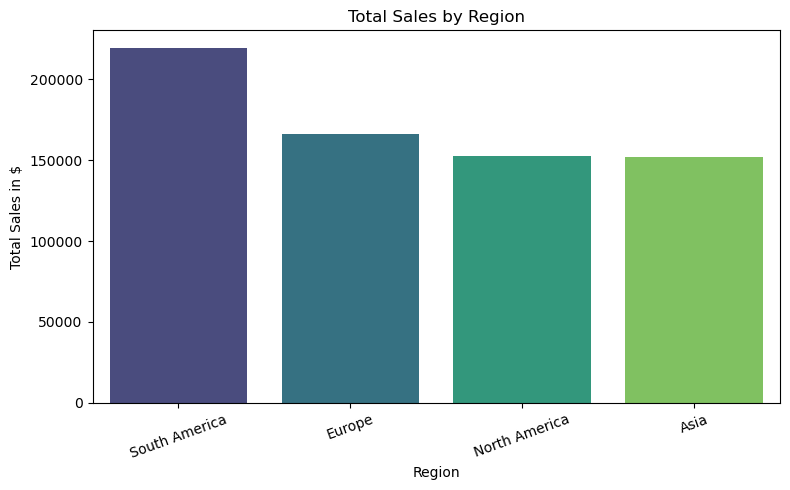

In [123]:
plt.figure(figsize=(8,5))
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales in $")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## 2Visaulization

C:\Users\hp\AppData\Local\Temp\ipykernel_24284\139070797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index,y=category_sales.values,palette="magma")


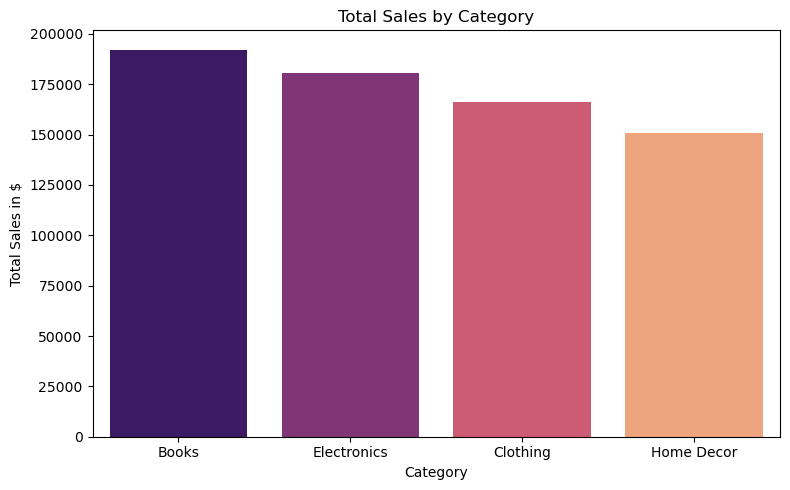

In [139]:
plt.figure(figsize=(8,5))
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index,y=category_sales.values,palette="magma")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales in $")
plt.tight_layout()
plt.show()

## 3Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_24284\1201749230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product.values,y=top_product.index,palette="magma")


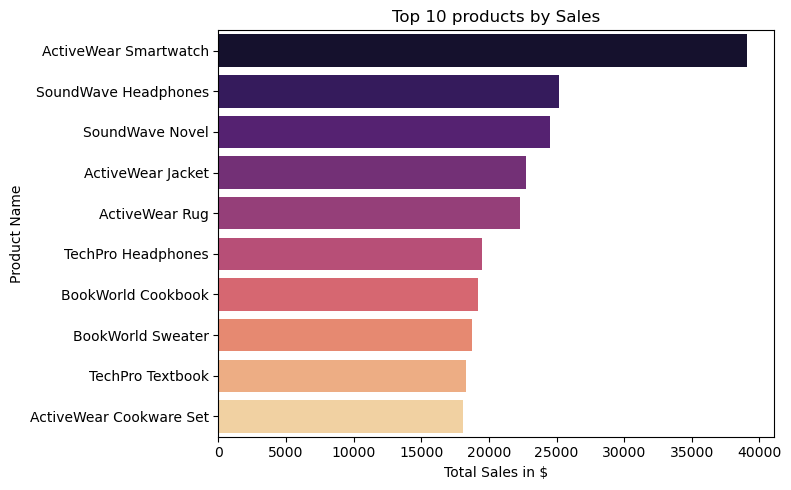

In [146]:
plt.figure(figsize=(8,5))
top_product = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_product.values,y=top_product.index,palette="magma")
plt.title("Top 10 products by Sales")
plt.xlabel("Total Sales in $")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [162]:
region_sales_sorted = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_sales_sorted

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

In [164]:
# Business Insights
insights = [
    "1. South America contributes the highest sales among all regions, indicating a strong market presence.",
    "2. Electronics category dominates sales, suggesting customers prioritize high-value tech products.",
    "3. Top 10 products include mostly electronics and high-value items, hinting at premium product preferences.",
    "4. Asia and North America have comparable sales, showing potential for targeted marketing strategies.",
    "5. Seasonal promotions on books and home decor could boost their sales, as they lag behind other categories."
]

# Save insights as a report
with open("business_insights.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")